<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
url = 'https://raw.githubusercontent.com/datasets/finance-vix/master/data/vix-daily.csv'
df = pd.read_csv(url, parse_dates=['DATE'], index_col='DATE')

In [6]:
ts = df['CLOSE']

In [7]:
ts.head()

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26


Step 2: Plot Time Series

<function matplotlib.pyplot.show(close=None, block=None)>

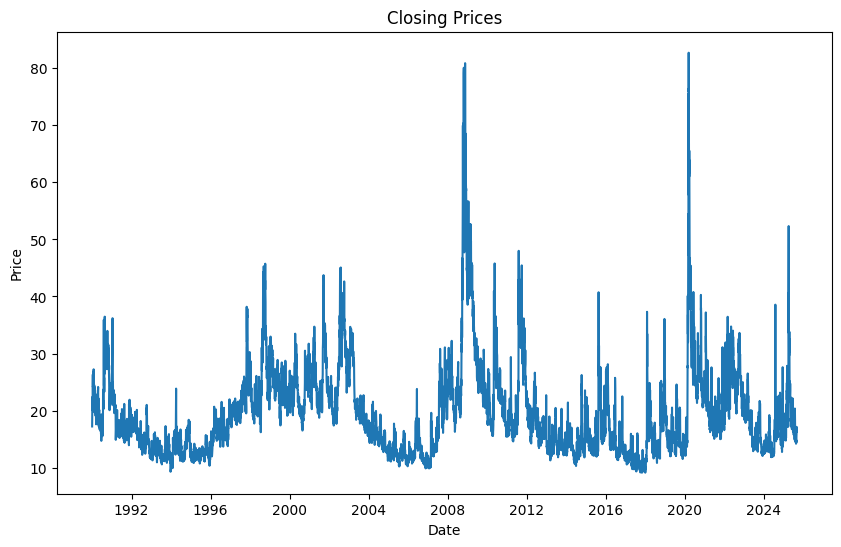

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show

Step 3: Train-Test Split

In [12]:
# Split into training and test sets (e.g., last 30 days for test)
train = ts[:-30]
test= ts[-30:]

Step 4: Fit ARIMA Model

In [13]:
# Fit ARIMA model (choose order p,d,q = 5,1,0 for example)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  CLOSE   No. Observations:                 8977
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -17204.970
Date:                Fri, 05 Sep 2025   AIC                          34421.940
Time:                        05:33:10   BIC                          34464.554
Sample:                             0   HQIC                         34436.443
                               - 8977                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1404      0.004    -35.898      0.000      -0.148      -0.133
ar.L2         -0.0542      0.003    -15.761      0.000      -0.061      -0.047
ar.L3         -0.0384      0.004     -9.512      0.000      -0.046      -0.030
ar.L4         -0.0782      0.005    -16.302      0.000      -0.088      -0.069
ar.L5         -0.0126      0.004     -2.847      0.004      -0.021      -0.004
sigma2         2.7065      0.012    233.290      0.000       2.684       2.729
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            275186.62
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Step 5: Forecast and Evaluate

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


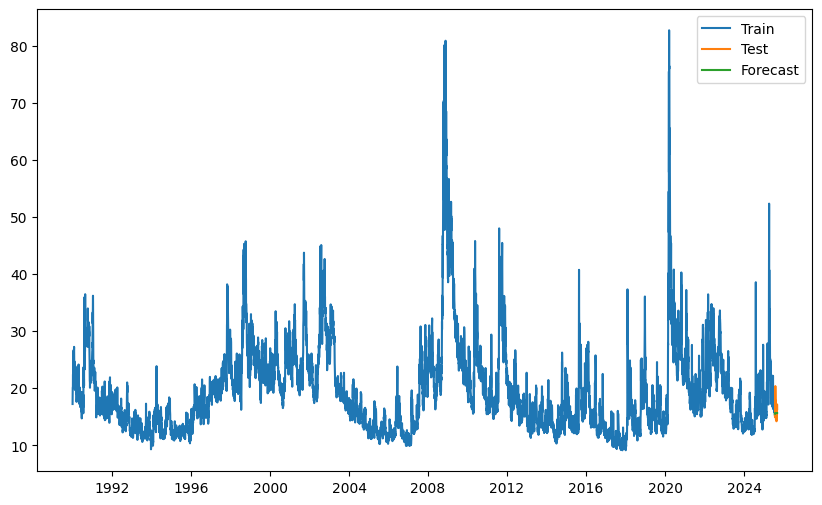

Mean Squared Error: 1.6319528201317302


In [14]:
# Forecast for test period
forecast = model_fit.forecast(steps=30)

# Plot actual vs forecasted values
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')